<function matplotlib.pyplot.show(*args, **kw)>

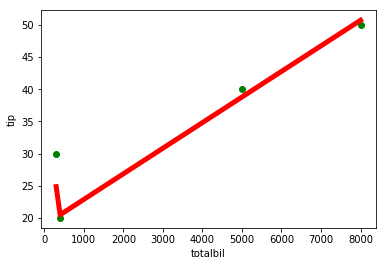

In [3]:
from numpy import *
import operator
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy.linalg
from scipy.stats.stats import pearsonr
def kernel(point,xmat,k):
    m,n=shape(xmat)
    weights=mat(eye((m)))
    for j in range(m):
        diff=point-X[j]
        weights[j,j]=exp(diff*diff.T/(-2.0*k**2))
        return weights
def localWeight(point,xmat,ymat,k):
    wei=kernel(point,xmat,k)
    W=((X.T*wei*X)).I*(X.T*(wei*ymat.T))
    return W
def localWeightRegression(xmat,ymat,k):
    m,n=shape(xmat)
    ypred=zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
    
data=pd.read_csv('tips.csv')
bill=array(data.bill)
tip=array(data.tip)
mbill=mat(bill)
mtip=mat(tip)
m=shape(mbill)[1]
one=mat(ones(m))
X=hstack((one.T,mbill.T))
ypred=localWeightRegression(X,mtip,0.5)
SortIndex=X[:,1].argsort(0)
xsort=X[SortIndex][:,0]
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(bill,tip,color='green')
ax.plot(xsort[:,1],ypred[SortIndex],color='red',linewidth=5)
plt.xlabel('totalbil')
plt.ylabel('tip')
plt.show




     x   y
0   10  23
1    1  34
2    6  26
3    7  28
4   21  12
5   30  12
6   32  34
7   31  30
8   29  34
9   27  33
10  28  30
11   1  34
12   2  30
13   3  25
14  12  22
15  11  20
16  10  19
17  20  15
18  21  16
19  22  17
20  23  19


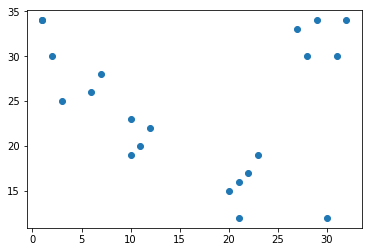

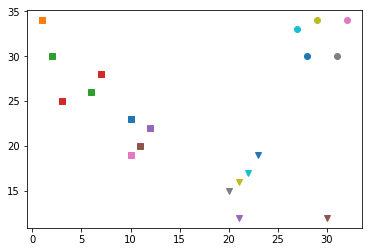

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("8.csv")
x1=data['x'].values
x2=data['y'].values
print(data)
X=np.matrix(list(zip(x1,x2)))
plt.scatter(x1,x2)
plt.show()
markers=['s','o','v']
k=3
clusters=KMeans(n_clusters=k).fit(X)
for i,l in enumerate(clusters.labels_):
    plt.plot(x1[i],x2[i],marker=markers[l])
    